In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.font_manager as fm
import os
df = pd.read_csv('classified_train.csv', encoding='utf-8')


In [11]:
def clean_and_categorize(df):
    # 괄호 안의 용어와 '**' 제거
    df['topic'] = df['topic'].apply(lambda x: re.sub(r"\([^)]*\)|\*\*", "", x).strip())
    df['prior_knowledge_needed'] = df['prior_knowledge_needed'].apply(lambda x: '필요 없음' if '필요 없음' in x else '필요함')

    
    # 미리 정의된 주제 그룹
    predefined_topics = ['문학', '독해', '언어와 매체', '사회', '한국사', '세계사', '경제', '지리', '심리', 
                         '교육산업', '국제', '부동산', '생활', '책마을']
    
    # 주제 분류
    df['topic'] = df['topic'].apply(lambda x: x if x in predefined_topics else 'ETC')
    
    return df

# 데이터 정제
df_cleaned = clean_and_categorize(df)
df_cleaned.head()

,id,topic,prior_knowledge_needed,paragraph,question,choices,answer,question_plus
0,generation-for-nlp-425,한국사,필요함,"상소하여 아뢰기를 , “신이 좌참 찬 송준길이 올린 차자를 보았는데 , 상복(喪服)...",상소한 인물이 속한 붕당에 대한 설명으로 옳은 것만을 모두 고르면?,"['ㄱ, ㄴ', 'ㄱ, ㄷ', 'ㄴ, ㄹ', 'ㄷ, ㄹ']",2,NaN
1,generation-for-nlp-426,한국사,필요함,"(가)은/는 의병계열과 애국계몽 운동 계열의 비밀결사가 모여 결성된 조직으로, 총사...",(가)에 대한 설명으로 옳지 않은 것은?,"['고려 문종 때에 남경(南京)으로 승격되었다.', '종루(鐘樓), 이현, 칠패 등...",1,NaN
2,generation-for-nlp-427,한국사,필요함,나는 삼한(三韓) 산천의 음덕을 입어 대업을 이루었다.(가)는/은 수덕(水德)이 순...,(가) 지역에 대한 설명으로 옳은 것은?,"['이곳에 대장도감을 설치하여 재조대장경을 만들었다.', '지눌이 이곳에서 수선사 ...",4,NaN
3,generation-for-nlp-428,한국사,필요함,이 날 소정방이 부총관 김인문 등과 함께 기 벌포에 도착하여 백제 군사와 마주쳤다....,밑줄 친 ‘그’에 대한 설명으로 옳은 것은?,"['살수에서 수의 군대를 물리쳤다 .', '김춘추 의 신라 왕위 계승을 지원하였다 ...",2,NaN
4,generation-for-nlp-429,한국사,필요함,"선비들 수만 명이 대궐 앞에 모여 만 동묘와 서원을 다시 설립할 것을 청하니, (가...",(가) 인물이 추진한 정책으로 옳지 않은 것은?,"['사창제를 실시하였다 .', '대전회통을 편찬하였다 .', '비변사의 기능을 강화...",3,NaN


/tmp/ipykernel_170294/564388076.py:22: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_170294/564388076.py:22: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_170294/564388076.py:22: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_170294/564388076.py:22: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_170294/564388076.py:22: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_170294/564388076.py:22: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_170294/564388076.py:22: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.ti

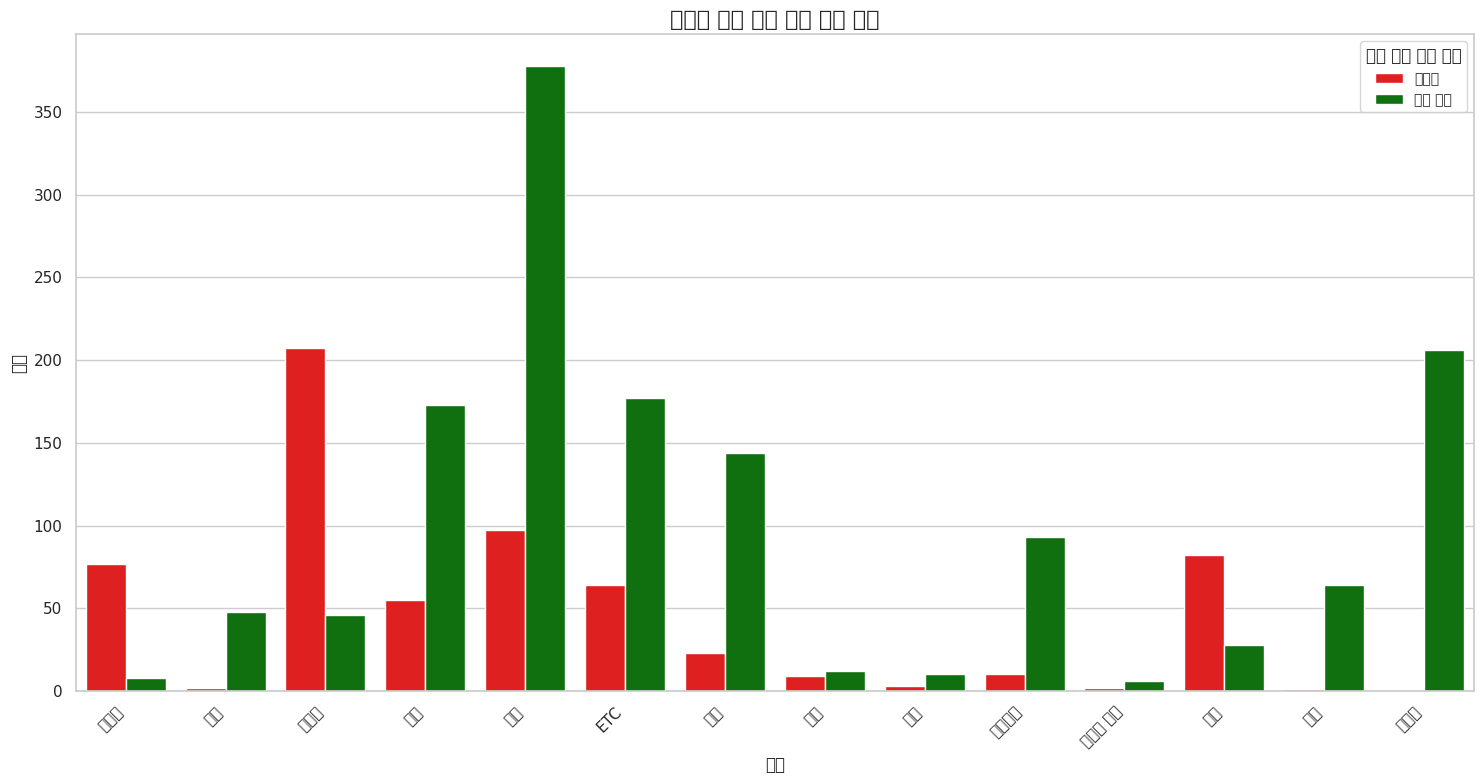

In [12]:
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(15, 8))

# 데이터 플로팅 (Prior Knowledge Needed를 색상으로 구분)
sns.countplot(data=df_cleaned, x='topic', hue='prior_knowledge_needed',
              hue_order=['필요함', '필요 없음'], palette={'필요함': 'red', '필요 없음': 'green'})

# 레이블과 제목 추가
plt.title('주제별 사전 지식 필요 여부 분포', fontsize=16)
plt.xlabel('주제', fontsize=12)
plt.ylabel('개수', fontsize=12)

# x축 레이블 회전 (한글 깨짐 방지를 위해 폰트 설정이 필요)
plt.xticks(rotation=45, ha='right')

# 범례 표시
plt.legend(title='사전 지식 필요 여부', title_fontsize='12', fontsize='10')

# 그래프 표시
plt.tight_layout()
plt.show()

In [13]:
# 주제별 사전 지식 필요 여부 비율 계산
topic_prior_knowledge = df_cleaned.groupby('topic')['prior_knowledge_needed'].value_counts(normalize=True).unstack()
topic_prior_knowledge = topic_prior_knowledge.sort_values('필요함', ascending=False)

print("주제별 사전 지식 필요 비율:")
print(topic_prior_knowledge)

# 가장 많이 등장한 주제 top 5
top_topics = df_cleaned['topic'].value_counts().head()

print("\n가장 많이 등장한 주제 Top 5:")
print(top_topics)

주제별 사전 지식 필요 비율:
prior_knowledge_needed     필요 없음       필요함
topic                                     
한국사                     0.094118  0.905882
세계사                     0.181818  0.818182
심리                      0.254545  0.745455
문학                      0.571429  0.428571
ETC                     0.734440  0.265560
언어와 매체                  0.750000  0.250000
사회                      0.758772  0.241228
지리                      0.769231  0.230769
경제                      0.795789  0.204211
국제                      0.862275  0.137725
교육산업                    0.902913  0.097087
독해                      0.960000  0.040000
생활                      0.984615  0.015385
부동산                     1.000000       NaN

가장 많이 등장한 주제 Top 5:
topic
경제     475
세계사    253
ETC    241
사회     228
부동산    206
Name: count, dtype: int64
